# **Import Library**

In [ ]:
# Install library transformers
!pip install transformers

In [ ]:
# Import Library
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# **Load Data & Pre Processing** #

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Datasets
df = pd.read_csv('/content/drive/MyDrive/praktikumsmt7/modul5/Dataset/cleaned_reviews.csv')


In [ ]:
# Menampilkan 10 data teratas
df.head(10)

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5.0
1,neutral,i ve learned this lesson again open the packag...,88,1.0
2,neutral,it is so slow and lags find better option,9,2.0
3,neutral,roller ball stopped working within months of m...,12,1.0
4,neutral,i like the color and size but it few days out ...,21,1.0
5,positive,overall love this mouse the size weight clicki...,68,3.0
6,neutral,it stopped working,3,1.0
7,positive,my son uses school issued chromebook for schoo...,170,1.0
8,negative,loved this cute little mouse but it broke afte...,17,1.0
9,negative,should ve spent the money to get quality produ...,17,1.0


In [ ]:
print(df['review_score'].value_counts())

5.0    9316
1.0    3898
4.0    1714
2.0    1295
3.0    1117
Name: review_score, dtype: int64


In [ ]:
df.isnull().sum()

sentiments               0
cleaned_review           3
cleaned_review_length    0
review_score             0
dtype: int64

In [ ]:
df = df.dropna(how='any')

In [ ]:
df.duplicated().sum()

1347

In [ ]:
df = df.drop_duplicates()

# **transfer learning dengan menggunakan model BERT** #

In [ ]:
sentiment_labels = {'positive': 2, 'neutral': 1, 'negative': 0}
df['sentiments'] = df['sentiments'].map(sentiment_labels)

In [ ]:
df.head(10)

,sentiments,cleaned_review,cleaned_review_length,review_score
0,2,i wish would have gotten one earlier love it a...,19,5.0
1,1,i ve learned this lesson again open the packag...,88,1.0
2,1,it is so slow and lags find better option,9,2.0
3,1,roller ball stopped working within months of m...,12,1.0
4,1,i like the color and size but it few days out ...,21,1.0
5,2,overall love this mouse the size weight clicki...,68,3.0
6,1,it stopped working,3,1.0
7,2,my son uses school issued chromebook for schoo...,170,1.0
8,0,loved this cute little mouse but it broke afte...,17,1.0
9,0,should ve spent the money to get quality produ...,17,1.0


In [ ]:
X = df['cleaned_review']
y = df['sentiments']

In [ ]:
# Membagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Menggunakan tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
#untuk mengkodekan (tokenize) ulasan (reviews) dalam bentuk teks menggunakan tokenizer tertentu
def encode_reviews(reviews, max_length=100):
    return tokenizer.batch_encode_plus(
        reviews.tolist(),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='tf'
    )

In [ ]:
encoded_X_train = encode_reviews(X_train)
encoded_X_test = encode_reviews(X_test)

In [ ]:
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

In [ ]:
# Memuat model BERT untuk klasifikasi teks
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(
    {'input_ids': encoded_X_train['input_ids'], 'attention_mask': encoded_X_train['attention_mask']},
    y_train_one_hot,
    validation_split=0.1,
    epochs=5,
    batch_size=64
)

Epoch 1/5
180/180 [==============================] - 265s 1s/step - loss: 0.4493 - accuracy: 0.8120 - val_loss: 0.2826 - val_accuracy: 0.8805
Epoch 2/5
180/180 [==============================] - 216s 1s/step - loss: 0.2154 - accuracy: 0.9151 - val_loss: 0.2440 - val_accuracy: 0.9031
Epoch 3/5
180/180 [==============================] - 218s 1s/step - loss: 0.1246 - accuracy: 0.9545 - val_loss: 0.2258 - val_accuracy: 0.9125
Epoch 4/5
180/180 [==============================] - 216s 1s/step - loss: 0.0766 - accuracy: 0.9749 - val_loss: 0.2427 - val_accuracy: 0.9195
Epoch 5/5
180/180 [==============================] - 218s 1s/step - loss: 0.0480 - accuracy: 0.9834 - val_loss: 0.3091 - val_accuracy: 0.9133


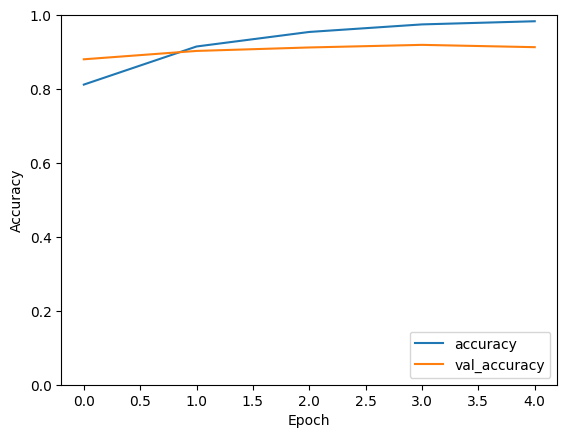

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

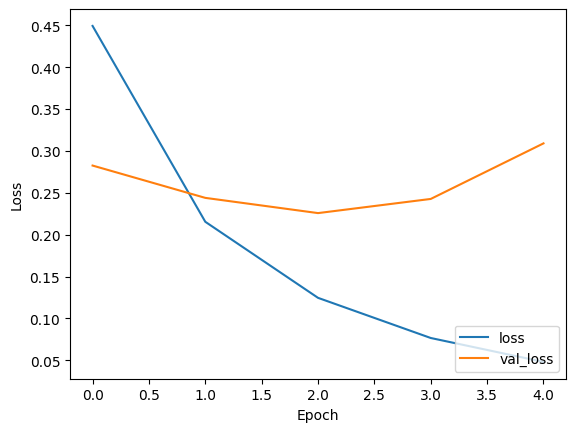

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_test_pred = model.predict({'input_ids': encoded_X_test['input_ids'], 'attention_mask': encoded_X_test['attention_mask']})
y_test_pred = np.argmax(y_test_pred, axis=-1)

100/100 [==============================] - 25s 211ms/step


In [ ]:
loss, accuracy = model.evaluate({'input_ids': encoded_X_test['input_ids'], 'attention_mask': encoded_X_test['attention_mask']}, y_test_one_hot, batch_size=16)

200/200 [==============================] - 26s 118ms/step - loss: 0.3052 - accuracy: 0.9190


In [ ]:
print("Akurasi:", accuracy)
print("Loss:", loss)

Akurasi: 0.9190118908882141
Loss: 0.30518975853919983


In [ ]:
predictions = model.predict({'input_ids': encoded_X_test['input_ids'], 'attention_mask': encoded_X_test['attention_mask']})
predicted_classes = tf.argmax(predictions['logits'], axis=1)

100/100 [==============================] - 22s 216ms/step


In [ ]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80       266
           1       0.87      0.92      0.89      1146
           2       0.96      0.94      0.95      1786

    accuracy                           0.92      3198
   macro avg       0.90      0.87      0.88      3198
weighted avg       0.92      0.92      0.92      3198



In [ ]:
# Menampilkan perbandingan antara true label dan predicted label
comp_df = pd.DataFrame({'True Label': y_test, 'Predicted Label': predicted_classes})
print(df)

       sentiments                                     cleaned_review  \
0               2  i wish would have gotten one earlier love it a...   
1               1  i ve learned this lesson again open the packag...   
2               1          it is so slow and lags find better option   
3               1  roller ball stopped working within months of m...   
4               1  i like the color and size but it few days out ...   
...           ...                                                ...   
17334           2  i bought it to keep it at work and everyone lo...   
17335           2  i love this speaker and love can take it anywh...   
17336           2  i use it in my house easy to connect and loud ...   
17337           2  the bass is good and the battery is amazing mu...   
17339           1                                       mono speaker   

       cleaned_review_length  review_score  
0                         19           5.0  
1                         88           1.0  
